In [2]:
!pip install wget


In [3]:
import pandas as pd
import wget
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

from sklearn.model_selection import train_test_split
from sklearn.metrics import mutual_info_score
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import KFold
from tqdm.auto import tqdm
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_text
from sklearn.ensemble import RandomForestClassifier

%matplotlib inline

In [4]:
url =  'https://raw.githubusercontent.com/Veranika23/attrition-prediction/refs/heads/main/WA_Fn-UseC_-HR-Employee-Attrition.csv'

In [5]:
downloaded_file = wget.download(url)

100% [.........................................] 227977 / 227977

In [6]:
df = pd.read_csv(downloaded_file)

In [7]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [8]:
df.columns = df.columns.str.lower().str.replace(' ', '_')

In [9]:
df.head()

,age,attrition,businesstravel,dailyrate,department,distancefromhome,education,educationfield,employeecount,employeenumber,...,relationshipsatisfaction,standardhours,stockoptionlevel,totalworkingyears,trainingtimeslastyear,worklifebalance,yearsatcompany,yearsincurrentrole,yearssincelastpromotion,yearswithcurrmanager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [10]:
df.isnull().sum()

age                         0
attrition                   0
businesstravel              0
dailyrate                   0
department                  0
distancefromhome            0
education                   0
educationfield              0
employeecount               0
employeenumber              0
environmentsatisfaction     0
gender                      0
hourlyrate                  0
jobinvolvement              0
joblevel                    0
jobrole                     0
jobsatisfaction             0
maritalstatus               0
monthlyincome               0
monthlyrate                 0
numcompaniesworked          0
over18                      0
overtime                    0
percentsalaryhike           0
performancerating           0
relationshipsatisfaction    0
standardhours               0
stockoptionlevel            0
totalworkingyears           0
trainingtimeslastyear       0
worklifebalance             0
yearsatcompany              0
yearsincurrentrole          0
yearssince

In [11]:
df.dtypes

age                          int64
attrition                   object
businesstravel              object
dailyrate                    int64
department                  object
distancefromhome             int64
education                    int64
educationfield              object
employeecount                int64
employeenumber               int64
environmentsatisfaction      int64
gender                      object
hourlyrate                   int64
jobinvolvement               int64
joblevel                     int64
jobrole                     object
jobsatisfaction              int64
maritalstatus               object
monthlyincome                int64
monthlyrate                  int64
numcompaniesworked           int64
over18                      object
overtime                    object
percentsalaryhike            int64
performancerating            int64
relationshipsatisfaction     int64
standardhours                int64
stockoptionlevel             int64
totalworkingyears   

In [12]:
education_values = {
    1: 'Below College',
    2: 'College',
    3: 'Bachelor',
    4: 'Master',
    5: 'Doctor'
}
df.education = df.education.map(education_values)

In [13]:
environment_values = {
    1: 'Low',
    2: 'Medium',
    3: 'High',
    4: 'Very High'
}
df.environmentsatisfaction = df.environmentsatisfaction.map(environment_values)

In [14]:
df.head().T

,0,1,2,3,4
age,41,49,37,33,27
attrition,Yes,No,Yes,No,No
businesstravel,Travel_Rarely,Travel_Frequently,Travel_Rarely,Travel_Frequently,Travel_Rarely
dailyrate,1102,279,1373,1392,591
department,Sales,Research & Development,Research & Development,Research & Development,Research & Development
distancefromhome,1,8,2,3,2
education,College,Below College,College,Master,Below College
educationfield,Life Sciences,Life Sciences,Other,Life Sciences,Medical
employeecount,1,1,1,1,1
employeenumber,1,2,4,5,7


In [15]:
involvement_values = {
    1: 'Low',
    2: 'Medium',
    3: 'High',
    4: 'Very High'
}
df.jobinvolvement = df.jobinvolvement.map(involvement_values)

In [16]:
job_level_values = {
    1: 'Junior',
    2: 'Middle',
    3: 'Senior',
    4: 'Lead',
    4: 'Manager'
}
df.joblevel = df.joblevel.map(job_level_values)

In [17]:
jobsatisfaction_values = {
    1: 'Low',
    2: 'Medium',
    3: 'High',
    4: 'Very High'
}
df.jobsatisfaction = df.jobsatisfaction.map(jobsatisfaction_values) 

In [18]:
performance_values = {
    1: 'Low',
    2: 'Good',
    3: 'Excellent',
    4: 'Outstanding'
}
df.performancerating = df.performancerating.map(performance_values)

In [19]:
relationshipsatisfaction_values = {
    1: 'Low',
    2: 'Medium',
    3: 'High',
    4: 'Very High'
}
df.relationshipsatisfaction = df.relationshipsatisfaction.map(relationshipsatisfaction_values)

In [20]:
df.head().T

,0,1,2,3,4
age,41,49,37,33,27
attrition,Yes,No,Yes,No,No
businesstravel,Travel_Rarely,Travel_Frequently,Travel_Rarely,Travel_Frequently,Travel_Rarely
dailyrate,1102,279,1373,1392,591
department,Sales,Research & Development,Research & Development,Research & Development,Research & Development
distancefromhome,1,8,2,3,2
education,College,Below College,College,Master,Below College
educationfield,Life Sciences,Life Sciences,Other,Life Sciences,Medical
employeecount,1,1,1,1,1
employeenumber,1,2,4,5,7


In [21]:
df.stockoptionlevel.value_counts()

stockoptionlevel
0    631
1    596
2    158
3     85
Name: count, dtype: int64

In [22]:
stockoption_values = {
    0: 'Not Eligible',
    1: 'Eligible L1',
    2: 'Eligible L2',
    3: 'Eligible L3'
}
df.stockoptionlevel = df.stockoptionlevel.map(stockoption_values)

In [23]:
worklifebalance_values = {
    1: 'Bad',
    2: 'Good',
    3: 'Better',
    4: 'Best'
}
df.worklifebalance = df.worklifebalance.map(worklifebalance_values)

In [24]:
df.head().T

,0,1,2,3,4
age,41,49,37,33,27
attrition,Yes,No,Yes,No,No
businesstravel,Travel_Rarely,Travel_Frequently,Travel_Rarely,Travel_Frequently,Travel_Rarely
dailyrate,1102,279,1373,1392,591
department,Sales,Research & Development,Research & Development,Research & Development,Research & Development
distancefromhome,1,8,2,3,2
education,College,Below College,College,Master,Below College
educationfield,Life Sciences,Life Sciences,Other,Life Sciences,Medical
employeecount,1,1,1,1,1
employeenumber,1,2,4,5,7


In [25]:
df.attrition.value_counts()

attrition
No     1233
Yes     237
Name: count, dtype: int64

In [26]:
attrition_values = {
    'Yes': 1,
    'No': 0
}
df.attrition = df.attrition.map(attrition_values)
df.head().T

,0,1,2,3,4
age,41,49,37,33,27
attrition,1,0,1,0,0
businesstravel,Travel_Rarely,Travel_Frequently,Travel_Rarely,Travel_Frequently,Travel_Rarely
dailyrate,1102,279,1373,1392,591
department,Sales,Research & Development,Research & Development,Research & Development,Research & Development
distancefromhome,1,8,2,3,2
education,College,Below College,College,Master,Below College
educationfield,Life Sciences,Life Sciences,Other,Life Sciences,Medical
employeecount,1,1,1,1,1
employeenumber,1,2,4,5,7


In [27]:
df.dtypes

age                          int64
attrition                    int64
businesstravel              object
dailyrate                    int64
department                  object
distancefromhome             int64
education                   object
educationfield              object
employeecount                int64
employeenumber               int64
environmentsatisfaction     object
gender                      object
hourlyrate                   int64
jobinvolvement              object
joblevel                    object
jobrole                     object
jobsatisfaction             object
maritalstatus               object
monthlyincome                int64
monthlyrate                  int64
numcompaniesworked           int64
over18                      object
overtime                    object
percentsalaryhike            int64
performancerating           object
relationshipsatisfaction    object
standardhours                int64
stockoptionlevel            object
totalworkingyears   

In [28]:
categorical_columns = list(df.dtypes[df.dtypes == 'object'].index)

In [29]:
categorical_columns

['businesstravel',
 'department',
 'education',
 'educationfield',
 'environmentsatisfaction',
 'gender',
 'jobinvolvement',
 'joblevel',
 'jobrole',
 'jobsatisfaction',
 'maritalstatus',
 'over18',
 'overtime',
 'performancerating',
 'relationshipsatisfaction',
 'stockoptionlevel',
 'worklifebalance']

In [30]:
for c in categorical_columns:
    df[c] = df[c].replace("_", " ").str.lower()

In [31]:
df.head().T

,0,1,2,3,4
age,41,49,37,33,27
attrition,1,0,1,0,0
businesstravel,travel_rarely,travel_frequently,travel_rarely,travel_frequently,travel_rarely
dailyrate,1102,279,1373,1392,591
department,sales,research & development,research & development,research & development,research & development
distancefromhome,1,8,2,3,2
education,college,below college,college,master,below college
educationfield,life sciences,life sciences,other,life sciences,medical
employeecount,1,1,1,1,1
employeenumber,1,2,4,5,7


In [32]:
df.describe().round(0).T

,count,mean,std,min,25%,50%,75%,max
age,1470.0,37.0,9.0,18.0,30.0,36.0,43.0,60.0
attrition,1470.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
dailyrate,1470.0,802.0,404.0,102.0,465.0,802.0,1157.0,1499.0
distancefromhome,1470.0,9.0,8.0,1.0,2.0,7.0,14.0,29.0
employeecount,1470.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0
employeenumber,1470.0,1025.0,602.0,1.0,491.0,1020.0,1556.0,2068.0
hourlyrate,1470.0,66.0,20.0,30.0,48.0,66.0,84.0,100.0
monthlyincome,1470.0,6503.0,4708.0,1009.0,2911.0,4919.0,8379.0,19999.0
monthlyrate,1470.0,14313.0,7118.0,2094.0,8047.0,14236.0,20462.0,26999.0
numcompaniesworked,1470.0,3.0,2.0,0.0,1.0,2.0,4.0,9.0


In [33]:
numerical_columns = list(df.dtypes[df.dtypes == 'int64'].index)

In [34]:
numerical_columns

['age',
 'attrition',
 'dailyrate',
 'distancefromhome',
 'employeecount',
 'employeenumber',
 'hourlyrate',
 'monthlyincome',
 'monthlyrate',
 'numcompaniesworked',
 'percentsalaryhike',
 'standardhours',
 'totalworkingyears',
 'trainingtimeslastyear',
 'yearsatcompany',
 'yearsincurrentrole',
 'yearssincelastpromotion',
 'yearswithcurrmanager']

In [35]:
df[numerical_columns].corr()

,age,attrition,dailyrate,distancefromhome,employeecount,employeenumber,hourlyrate,monthlyincome,monthlyrate,numcompaniesworked,percentsalaryhike,standardhours,totalworkingyears,trainingtimeslastyear,yearsatcompany,yearsincurrentrole,yearssincelastpromotion,yearswithcurrmanager
age,1.000000,-0.159205,0.010661,-0.001686,NaN,-0.010145,0.024287,0.497855,0.028051,0.299635,0.003634,NaN,0.680381,-0.019621,0.311309,0.212901,0.216513,0.202089
attrition,-0.159205,1.000000,-0.056652,0.077924,NaN,-0.010577,-0.006846,-0.159840,0.015170,0.043494,-0.013478,NaN,-0.171063,-0.059478,-0.134392,-0.160545,-0.033019,-0.156199
dailyrate,0.010661,-0.056652,1.000000,-0.004985,NaN,-0.050990,0.023381,0.007707,-0.032182,0.038153,0.022704,NaN,0.014515,0.002453,-0.034055,0.009932,-0.033229,-0.026363
distancefromhome,-0.001686,0.077924,-0.004985,1.000000,NaN,0.032916,0.031131,-0.017014,0.027473,-0.029251,0.040235,NaN,0.004628,-0.036942,0.009508,0.018845,0.010029,0.014406
employeecount,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
employeenumber,-0.010145,-0.010577,-0.050990,0.032916,NaN,1.000000,0.035179,-0.014829,0.012648,-0.001251,-0.012944,NaN,-0.014365,0.023603,-0.011240,-0.008416,-0.009019,-0.009197
hourlyrate,0.024287,-0.006846,0.023381,0.031131,NaN,0.035179,1.000000,-0.015794,-0.015297,0.022157,-0.009062,NaN,-0.002334,-0.008548,-0.019582,-0.024106,-0.026716,-0.020123
monthlyincome,0.497855,-0.159840,0.007707,-0.017014,NaN,-0.014829,-0.015794,1.000000,0.034814,0.149515,-0.027269,NaN,0.772893,-0.021736,0.514285,0.363818,0.344978,0.344079
monthlyrate,0.028051,0.015170,-0.032182,0.027473,NaN,0.012648,-0.015297,0.034814,1.000000,0.017521,-0.006429,NaN,0.026442,0.001467,-0.023655,-0.012815,0.001567,-0.036746
numcompaniesworked,0.299635,0.043494,0.038153,-0.029251,NaN,-0.001251,0.022157,0.149515,0.017521,1.000000,-0.010238,NaN,0.237639,-0.066054,-0.118421,-0.090754,-0.036814,-0.110319


Employee count and standard hours have no correlarion with attrition so let's exclude them

In [36]:
del df['employeecount']

In [37]:
del df['standardhours']

In [38]:
numerical_columns = list(df.dtypes[df.dtypes == 'int64'].index)

In [39]:
def mutual_info_converted_score (series):
    return mutual_info_score(series, df.attrition.values)

In [40]:
categorical_columns

['businesstravel',
 'department',
 'education',
 'educationfield',
 'environmentsatisfaction',
 'gender',
 'jobinvolvement',
 'joblevel',
 'jobrole',
 'jobsatisfaction',
 'maritalstatus',
 'over18',
 'overtime',
 'performancerating',
 'relationshipsatisfaction',
 'stockoptionlevel',
 'worklifebalance']

In [41]:
df[categorical_columns] = df[categorical_columns].fillna('NA')

In [42]:
mi = df[categorical_columns].apply(mutual_info_converted_score)
mi.sort_values(ascending = False).to_frame(name= 'mutual information')

,mutual information
jobrole,0.030241
overtime,0.027688
joblevel,0.024980
stockoptionlevel,0.020984
maritalstatus,0.014966
jobinvolvement,0.008732
businesstravel,0.008082
environmentsatisfaction,0.006998
jobsatisfaction,0.005904
educationfield,0.005068


department, relationshipsatisfaction, education, gender, performancerating, over18 do not explain target variable (attrition). Let's exclude them

In [43]:
del df['department']

In [44]:
del df['relationshipsatisfaction']

In [45]:
del df['education']

In [46]:
del df['gender']

In [47]:
del df['performancerating']

In [48]:
del df['over18']

In [49]:
categorical_columns = list(df.dtypes[df.dtypes == 'object'].index)

Modeling

In [50]:
df_full_train, df_test = train_test_split(df, test_size = 0.2, random_state = 42)

In [51]:
df_train, df_val = train_test_split(df_full_train, test_size = 0.25, random_state = 42)

In [52]:
df_train.reset_index(drop = True)
df_val.reset_index(drop = True)
df_test.reset_index(drop = True)

,age,attrition,businesstravel,dailyrate,distancefromhome,educationfield,employeenumber,environmentsatisfaction,hourlyrate,jobinvolvement,...,overtime,percentsalaryhike,stockoptionlevel,totalworkingyears,trainingtimeslastyear,worklifebalance,yearsatcompany,yearsincurrentrole,yearssincelastpromotion,yearswithcurrmanager
0,28,0,travel_rarely,866,5,medical,1469,very high,84,high,...,no,18,not eligible,6,4,better,5,4,1,3
1,53,0,travel_rarely,1084,13,medical,250,very high,57,very high,...,no,11,eligible l2,5,3,better,4,2,1,3
2,24,1,travel_rarely,240,22,human resources,1714,very high,58,low,...,no,11,eligible l1,1,2,better,1,0,0,0
3,45,0,travel_rarely,1339,7,life sciences,86,medium,59,high,...,no,17,eligible l1,25,2,better,1,0,0,0
4,36,0,travel_rarely,1396,5,life sciences,304,very high,62,high,...,no,16,not eligible,16,3,best,13,11,3,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
289,34,0,travel_rarely,304,2,other,786,very high,60,high,...,no,22,not eligible,6,5,better,6,5,1,4
290,34,0,travel_rarely,167,8,life sciences,775,medium,32,high,...,no,14,eligible l1,7,3,better,0,0,0,0
291,50,0,travel_rarely,1322,28,life sciences,1317,very high,43,high,...,yes,11,not eligible,25,2,better,3,2,1,2
292,37,0,travel_rarely,1225,10,life sciences,715,very high,80,very high,...,no,17,not eligible,4,2,better,1,0,0,0


In [53]:
y_train = df_train.attrition.values
y_val = df_val.attrition.values
y_test = df_test.attrition.values
y_full_train = df_full_train.attrition.values

In [54]:
del df_train['attrition']
del df_val['attrition']
del df_test['attrition']

Logistic Regression

In [55]:
numerical_columns = list(df_train.dtypes[df.dtypes == 'int64'].index)

In [56]:
train_dicts = df_train[categorical_columns + numerical_columns].to_dict(orient = 'records')

In [57]:
val_dicts = df_val[categorical_columns + numerical_columns].to_dict(orient = 'records')

In [58]:
dv = DictVectorizer(sparse=False)

In [59]:
X_train = dv.fit_transform(train_dicts)

In [60]:
X_val = dv.transform(val_dicts)

In [61]:
model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000, random_state=42)

In [62]:
model.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,42
,solver,'liblinear'
,max_iter,1000
,multi_class,'deprecated'


In [63]:
y_pred = model.predict_proba(X_val)[:,1]
(y_val == (y_pred >= 0.5)).mean()

np.float64(0.8741496598639455)

In [64]:
roc_auc_score(y_val, y_pred)

0.891311475409836

Now let's tune C parameter

In [65]:
def train(df_train, y_train, C=1.0):
    dicts = df_train[categorical_columns + numerical_columns].to_dict(orient='records')

    dv = DictVectorizer(sparse=False)
    X_train = dv.fit_transform(dicts)

    model = LogisticRegression(C=C, max_iter=1000)
    model.fit(X_train, y_train)
    
    return dv, model

In [66]:
def predict(df, dv, model):
    dicts = df[categorical_columns + numerical_columns].to_dict(orient='records')

    X = dv.transform(dicts)
    y_pred = model.predict_proba(X)[:, 1]

    return y_pred

In [67]:
n_splits = 5

for C in tqdm([0.001, 0.01, 0.1, 0.5, 1, 5, 10]):
    kfold = KFold(n_splits=n_splits, shuffle=True, random_state=1)

    scores = []

    for train_idx, val_idx in kfold.split(df_full_train):
        df_train = df_full_train.iloc[train_idx]
        df_val = df_full_train.iloc[val_idx]

        y_train = df_train.attrition.values
        y_val = df_val.attrition.values

        dv, model = train(df_train, y_train, C=C)
        y_pred = predict(df_val, dv, model)

        auc = roc_auc_score(y_val, y_pred)
        scores.append(auc)

    print('C=%s %.3f +- %.3f' % (C, np.mean(scores), np.std(scores)))

  0%|          | 0/7 [00:00<?, ?it/s]

/home/codespace/.local/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/codespace/.local/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessi

C=0.001 0.716 +- 0.019


/home/codespace/.local/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/codespace/.local/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessi

C=0.01 0.774 +- 0.037


/home/codespace/.local/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/codespace/.local/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessi

C=0.1 0.802 +- 0.023


/home/codespace/.local/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/codespace/.local/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessi

C=0.5 0.782 +- 0.033


/home/codespace/.local/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/codespace/.local/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessi

C=1 0.797 +- 0.035


/home/codespace/.local/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/codespace/.local/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessi

C=5 0.789 +- 0.026


/home/codespace/.local/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/codespace/.local/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessi

C=10 0.789 +- 0.028


/home/codespace/.local/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


C = 0.1 shows the best auc score. The final model for Logistic Regression is:

In [68]:
del df_full_train['attrition']

In [69]:
dv, model = train(df_full_train, y_full_train, C=0.1)
y_pred = predict(df_test, dv, model)

logistic_auc = roc_auc_score(y_test, y_pred)

/home/codespace/.local/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [70]:
print(logistic_auc)

0.7105077928607341


Decision Tree

In [71]:
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=1)
df_train, df_val = train_test_split(df_full_train, test_size = 0.25, random_state = 42)

In [72]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [73]:
y_train = df_train.attrition.values
y_val = df_val.attrition.values
y_test = df_test.attrition.values

In [74]:
del df_train['attrition']
del df_val['attrition']
del df_test['attrition']

In [75]:
train_dicts = df_train.to_dict(orient='records')

In [76]:
dv = DictVectorizer(sparse=False)

In [77]:
X_train = dv.fit_transform(train_dicts)

In [78]:
val_dicts = df_val.to_dict(orient='records')
X_val = dv.transform(val_dicts)

In [79]:
dt = DecisionTreeClassifier()

In [80]:
dt.fit(X_train, y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [81]:
y_pred = dt.predict_proba(X_val)[:, 1]
roc_auc_score(y_val, y_pred)

0.5944262295081968

Now let's tune decision tree model

In [82]:
depths = [1, 2, 3, 4, 5, 6, 10, 15, 20, None]

for depth in depths: 
    dt = DecisionTreeClassifier(max_depth=depth)
    dt.fit(X_train, y_train)
    
    y_pred = dt.predict_proba(X_val)[:, 1]
    auc = roc_auc_score(y_val, y_pred)
    
    print('%4s -> %.3f' % (depth, auc))

   1 -> 0.535
   2 -> 0.613
   3 -> 0.655
   4 -> 0.696
   5 -> 0.671
   6 -> 0.623
  10 -> 0.594
  15 -> 0.609
  20 -> 0.615
None -> 0.635


Decision Tree with maximum depth = 4 has the best auc score

In [83]:
scores = []

for depth in [3, 4, 5]:
    for s in [1, 5, 10, 15, 20, 500, 100, 200]:
        dt = DecisionTreeClassifier(max_depth=depth, min_samples_leaf=s)
        dt.fit(X_train, y_train)

        y_pred = dt.predict_proba(X_val)[:, 1]
        auc = roc_auc_score(y_val, y_pred)
        
        scores.append((depth, s, auc))

In [84]:
columns = ['max_depth', 'min_samples_leaf', 'auc']
df_scores = pd.DataFrame(scores, columns=columns)

In [85]:
df_scores_pivot = df_scores.pivot(index='min_samples_leaf', columns=['max_depth'], values=['auc'])
df_scores_pivot.round(3)

auc              
max_depth             3      4      5
min_samples_leaf                     
1                 0.655  0.696  0.651
5                 0.650  0.632  0.654
10                0.650  0.684  0.724
15                0.650  0.668  0.686
20                0.650  0.644  0.672
100               0.638  0.639  0.636
200               0.567  0.567  0.567
500               0.500  0.500  0.500

<Axes: xlabel='None-max_depth', ylabel='min_samples_leaf'>

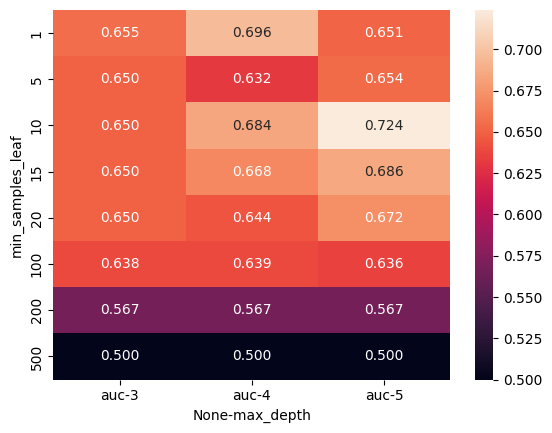

In [86]:
sns.heatmap(df_scores_pivot, annot=True, fmt=".3f")

Decision Tree model with max depth 5 and min sample leaf 10 has the best auc

In [87]:
y_full_train = df_full_train.attrition.values

In [88]:
test_dicts = df_test.to_dict(orient='records')
X_test = dv.transform(test_dicts)

In [115]:
del df_full_train['attrition']

In [116]:
df_full_train

,age,businesstravel,dailyrate,distancefromhome,educationfield,employeenumber,environmentsatisfaction,hourlyrate,jobinvolvement,joblevel,...,overtime,percentsalaryhike,stockoptionlevel,totalworkingyears,trainingtimeslastyear,worklifebalance,yearsatcompany,yearsincurrentrole,yearssincelastpromotion,yearswithcurrmanager
163,57,travel_rarely,334,24,life sciences,223,high,83,very high,senior,...,yes,16,eligible l1,12,2,bad,5,3,1,4
47,37,travel_rarely,408,19,life sciences,61,medium,73,high,junior,...,no,21,not eligible,8,1,better,1,0,0,0
1085,31,travel_frequently,561,3,life sciences,1537,very high,33,high,junior,...,no,12,not eligible,7,2,bad,7,2,7,7
98,58,travel_rarely,682,10,medical,131,very high,37,high,manager,...,no,13,not eligible,38,1,good,37,10,1,8
942,36,travel_rarely,325,10,technical degree,1312,very high,63,high,senior,...,no,12,not eligible,10,0,better,7,7,1,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
715,33,travel_frequently,827,1,other,998,high,84,very high,middle,...,yes,13,eligible l1,6,2,better,6,5,1,2
905,29,travel_rarely,694,1,life sciences,1264,very high,87,medium,manager,...,no,14,eligible l2,9,2,good,7,7,1,7
1096,40,travel_rarely,898,6,medical,1550,high,38,high,manager,...,yes,21,not eligible,21,2,better,21,7,7,7
235,43,travel_rarely,1034,16,marketing,327,very high,80,high,manager,...,yes,22,eligible l1,22,3,better,17,13,1,9


In [117]:
full_train_dicts = df_full_train.to_dict(orient='records')
X_full_train = dv.transform(full_train_dicts)

In [118]:
dt = DecisionTreeClassifier(max_depth=5, min_samples_leaf=10)
dt.fit(X_full_train, y_full_train)

,criterion,'gini'
,splitter,'best'
,max_depth,5
,min_samples_split,2
,min_samples_leaf,10
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [119]:
y_pred = dt.predict_proba(X_test)[:, 1]
auc = roc_auc_score(y_test, y_pred)

In [120]:
print(auc)

0.6702586206896551


In [121]:
print(export_text(dt, feature_names=list(dv.get_feature_names_out())))

|--- overtime=yes <= 0.50
|   |--- totalworkingyears <= 2.50
|   |   |--- jobrole=research scientist <= 0.50
|   |   |   |--- age <= 31.50
|   |   |   |   |--- worklifebalance=better <= 0.50
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- worklifebalance=better >  0.50
|   |   |   |   |   |--- class: 0
|   |   |   |--- age >  31.50
|   |   |   |   |--- class: 0
|   |   |--- jobrole=research scientist >  0.50
|   |   |   |--- dailyrate <= 725.00
|   |   |   |   |--- class: 0
|   |   |   |--- dailyrate >  725.00
|   |   |   |   |--- class: 0
|   |--- totalworkingyears >  2.50
|   |   |--- environmentsatisfaction=low <= 0.50
|   |   |   |--- yearssincelastpromotion <= 13.50
|   |   |   |   |--- jobrole=sales representative <= 0.50
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- jobrole=sales representative >  0.50
|   |   |   |   |   |--- class: 0
|   |   |   |--- yearssincelastpromotion >  13.50
|   |   |   |   |--- class: 0
|   |   |--- environmentsatisfaction=low >  0.50


Random Forest

In [122]:
scores = []

for n in range(10, 201, 10):
    rf = RandomForestClassifier(n_estimators=n, random_state=1)
    rf.fit(X_train, y_train)

    y_pred = rf.predict_proba(X_val)[:, 1]
    auc = roc_auc_score(y_val, y_pred)
    
    scores.append((n, auc))

In [123]:
df_scores = pd.DataFrame(scores, columns=['n_estimators', 'auc'])

In [124]:
df_scores

,n_estimators,auc
0,10,0.749385
1,20,0.760164
2,30,0.767377
3,40,0.763443
4,50,0.755041
5,60,0.759385
6,70,0.751885
7,80,0.755164
8,90,0.751967
9,100,0.754754


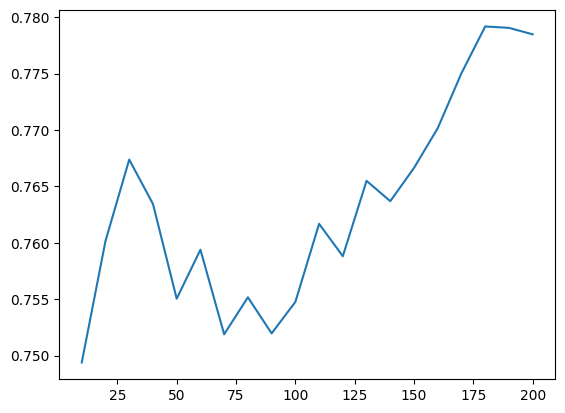

In [125]:
plt.plot(df_scores.n_estimators, df_scores.auc)

In [126]:
scores = []

for d in [5, 10, 15]:
    for n in range(10, 201, 10):
        rf = RandomForestClassifier(n_estimators=n,
                                    max_depth=d,
                                    random_state=1)
        rf.fit(X_train, y_train)

        y_pred = rf.predict_proba(X_val)[:, 1]
        auc = roc_auc_score(y_val, y_pred)

        scores.append((d, n, auc))

In [127]:
columns = ['max_depth', 'n_estimators', 'auc']
df_scores = pd.DataFrame(scores, columns=columns)

In [128]:
df_scores

,max_depth,n_estimators,auc
0,5,10,0.722049
1,5,20,0.747623
2,5,30,0.753361
3,5,40,0.743033
4,5,50,0.747459
5,5,60,0.757295
6,5,70,0.760328
7,5,80,0.761148
8,5,90,0.760902
9,5,100,0.764836


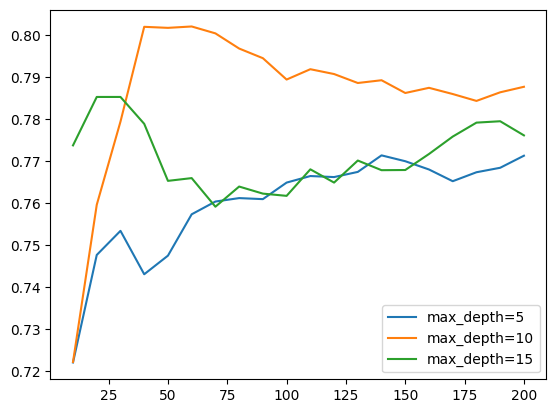

In [129]:
for d in [5, 10, 15]:
    df_subset = df_scores[df_scores.max_depth == d]
    
    plt.plot(df_subset.n_estimators, df_subset.auc,
             label='max_depth=%d' % d)

plt.legend()

max_depth = 10 has the best auc score

In [130]:
max_depth = 10

In [131]:
scores = []

for s in [1, 3, 5, 10, 50]:
    for n in range(10, 201, 10):
        rf = RandomForestClassifier(n_estimators=n,
                                    max_depth=max_depth,
                                    min_samples_leaf=s,
                                    random_state=1)
        rf.fit(X_train, y_train)

        y_pred = rf.predict_proba(X_val)[:, 1]
        auc = roc_auc_score(y_val, y_pred)

        scores.append((s, n, auc))

In [132]:
columns = ['min_samples_leaf', 'n_estimators', 'auc']
df_scores = pd.DataFrame(scores, columns=columns)

In [133]:
df_scores.T

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
min_samples_leaf,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000
n_estimators,10.000000,20.000000,30.000000,40.000000,50.000000,60.000000,70.000000,80.000000,90.000000,100.000000,...,110.000000,120.000000,130.000000,140.000000,150.000000,160.000000,170.000000,180.000000,190.000000,200.000000
auc,0.722172,0.759549,0.779344,0.801885,0.801639,0.801967,0.800328,0.796721,0.794426,0.789344,...,0.714672,0.715082,0.716639,0.718361,0.715656,0.713197,0.713361,0.714508,0.716393,0.719508


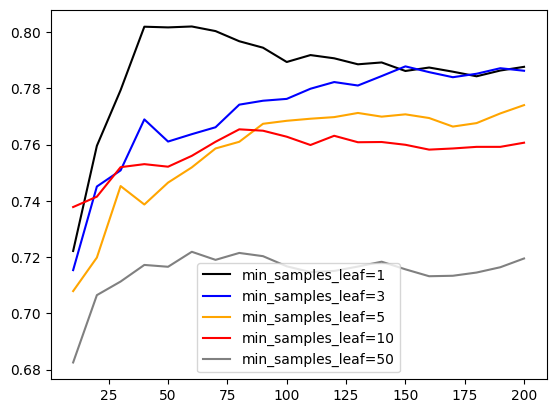

In [134]:
colors = ['black', 'blue', 'orange', 'red', 'grey']
values = [1, 3, 5, 10, 50]

for s, col in zip(values, colors):
    df_subset = df_scores[df_scores.min_samples_leaf == s]
    
    plt.plot(df_subset.n_estimators, df_subset.auc,
             color=col,
             label='min_samples_leaf=%d' % s)

plt.legend()

min_samples_leaf = 1 has the best auc score

In [135]:
min_samples_leaf = 1 

In [136]:
rf = RandomForestClassifier(n_estimators=60,
                            max_depth=max_depth,
                            min_samples_leaf=min_samples_leaf,
                            random_state=1)
rf.fit(X_full_train, y_full_train)

,n_estimators,60
,criterion,'gini'
,max_depth,10
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [137]:
y_pred = rf.predict_proba(X_test)[:, 1]
auc = roc_auc_score(y_test, y_pred)

In [138]:
auc

0.8235680888369376

In [139]:
df_full_train

,age,businesstravel,dailyrate,distancefromhome,educationfield,employeenumber,environmentsatisfaction,hourlyrate,jobinvolvement,joblevel,...,overtime,percentsalaryhike,stockoptionlevel,totalworkingyears,trainingtimeslastyear,worklifebalance,yearsatcompany,yearsincurrentrole,yearssincelastpromotion,yearswithcurrmanager
163,57,travel_rarely,334,24,life sciences,223,high,83,very high,senior,...,yes,16,eligible l1,12,2,bad,5,3,1,4
47,37,travel_rarely,408,19,life sciences,61,medium,73,high,junior,...,no,21,not eligible,8,1,better,1,0,0,0
1085,31,travel_frequently,561,3,life sciences,1537,very high,33,high,junior,...,no,12,not eligible,7,2,bad,7,2,7,7
98,58,travel_rarely,682,10,medical,131,very high,37,high,manager,...,no,13,not eligible,38,1,good,37,10,1,8
942,36,travel_rarely,325,10,technical degree,1312,very high,63,high,senior,...,no,12,not eligible,10,0,better,7,7,1,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
715,33,travel_frequently,827,1,other,998,high,84,very high,middle,...,yes,13,eligible l1,6,2,better,6,5,1,2
905,29,travel_rarely,694,1,life sciences,1264,very high,87,medium,manager,...,no,14,eligible l2,9,2,good,7,7,1,7
1096,40,travel_rarely,898,6,medical,1550,high,38,high,manager,...,yes,21,not eligible,21,2,better,21,7,7,7
235,43,travel_rarely,1034,16,marketing,327,very high,80,high,manager,...,yes,22,eligible l1,22,3,better,17,13,1,9


In [140]:
df_full_train.iloc[45]

age                                           52
businesstravel                     travel_rarely
dailyrate                                   1325
distancefromhome                              11
educationfield                     life sciences
employeenumber                               813
environmentsatisfaction                very high
hourlyrate                                    82
jobinvolvement                              high
joblevel                                  middle
jobrole                    laboratory technician
jobsatisfaction                             high
maritalstatus                            married
monthlyincome                               3149
monthlyrate                                21821
numcompaniesworked                             8
overtime                                      no
percentsalaryhike                             20
stockoptionlevel                     eligible l1
totalworkingyears                              9
trainingtimeslastyea

Random Forest has the best performance on the test data